In [1]:
%run Jansen_And_Rit.py

In [2]:
%run OptimiseFunctions.py

In [3]:
#x1, x2, x3, V_T_sim = run_jansen_and_rit(10,10,94,101,35,10,0.367,1,0.66,0,0.5)
x1, x2, x3, V_T_sim = run_jansen_and_rit_with_caching(3.25,22,135,100,50,50,0.56,0.56,0.56,0,0)

In [4]:
V_T_sim.shape

(2000, 62)

In [30]:
leadfield = scipy.io.loadmat('reshaped_leadfield.mat')
leadfield = leadfield['leadfield'] # Shape (100, 62, 3)
# leadfield = np.linalg.norm(leadfield, axis=-1).T
leadfield = np.sum(leadfield, axis=-1).T #(62, 100)

row_sums = np.zeros(62)
for i in range(62):
    row_sums[i] = np.sum(leadfield[i])

for i in range(62): # (100, )
    leadfield[i] = leadfield[i] / row_sums[i]
    
# Verify that the sum of each row is 1
print(np.allclose(leadfield.sum(axis=1), 1))

True


In [6]:
output = np.zeros((62, 2000))
time_points_in_2_secs = 2000
#V_T_sim = C2 * x1[-time_points_in_2_secs:] - C4 * x2[-time_points_in_2_secs:] + C * alpha * x3[-time_points_in_2_secs:]

# Normalize V_T_sim
V_T_sim = scipy.stats.zscore(V_T_sim)

# Initialize the output array
output = np.zeros((62, 2000))

# Vectorized operation
output = np.dot(leadfield, V_T_sim.T)

# Check the shape of the output
print(output.shape) 

(100, 2000)


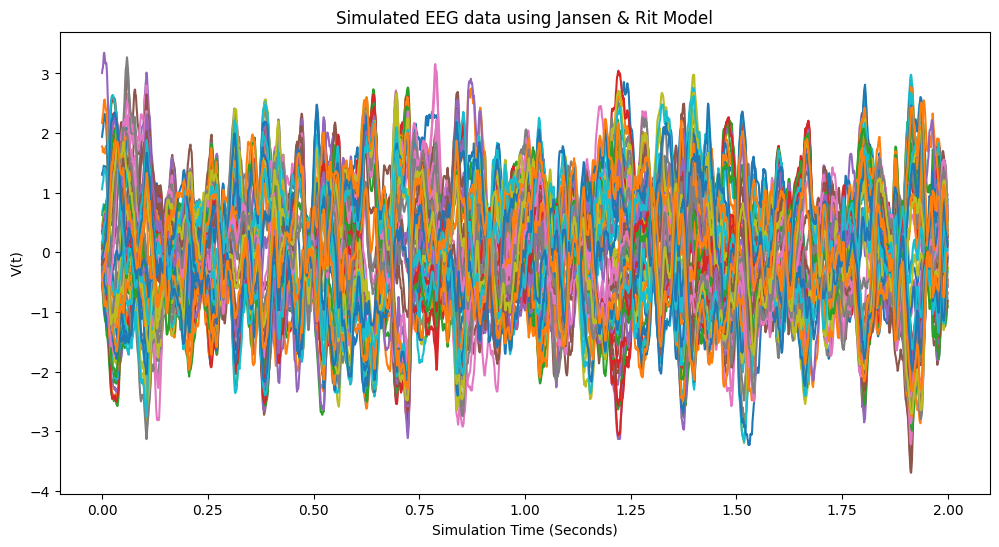

In [8]:
%matplotlib inline
# Plot EEG Results #################################################################
fig = plt.figure(figsize=(12, 6)) 

time_seconds = np.arange(V_T_sim.shape[0]) / eeg_freq

# Plot V_T for each node
for node in range(62):
    plt.plot(time_seconds, V_T_sim[:, node], label=f'Node {node+1}')

plt.xlabel('Simulation Time (Seconds)')
plt.ylabel('V(t)')
plt.title('Simulated EEG data using Jansen & Rit Model')

# Add legend to the right of the plot
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()
plt.close(fig)

IndexError: index 62 is out of bounds for axis 1 with size 62

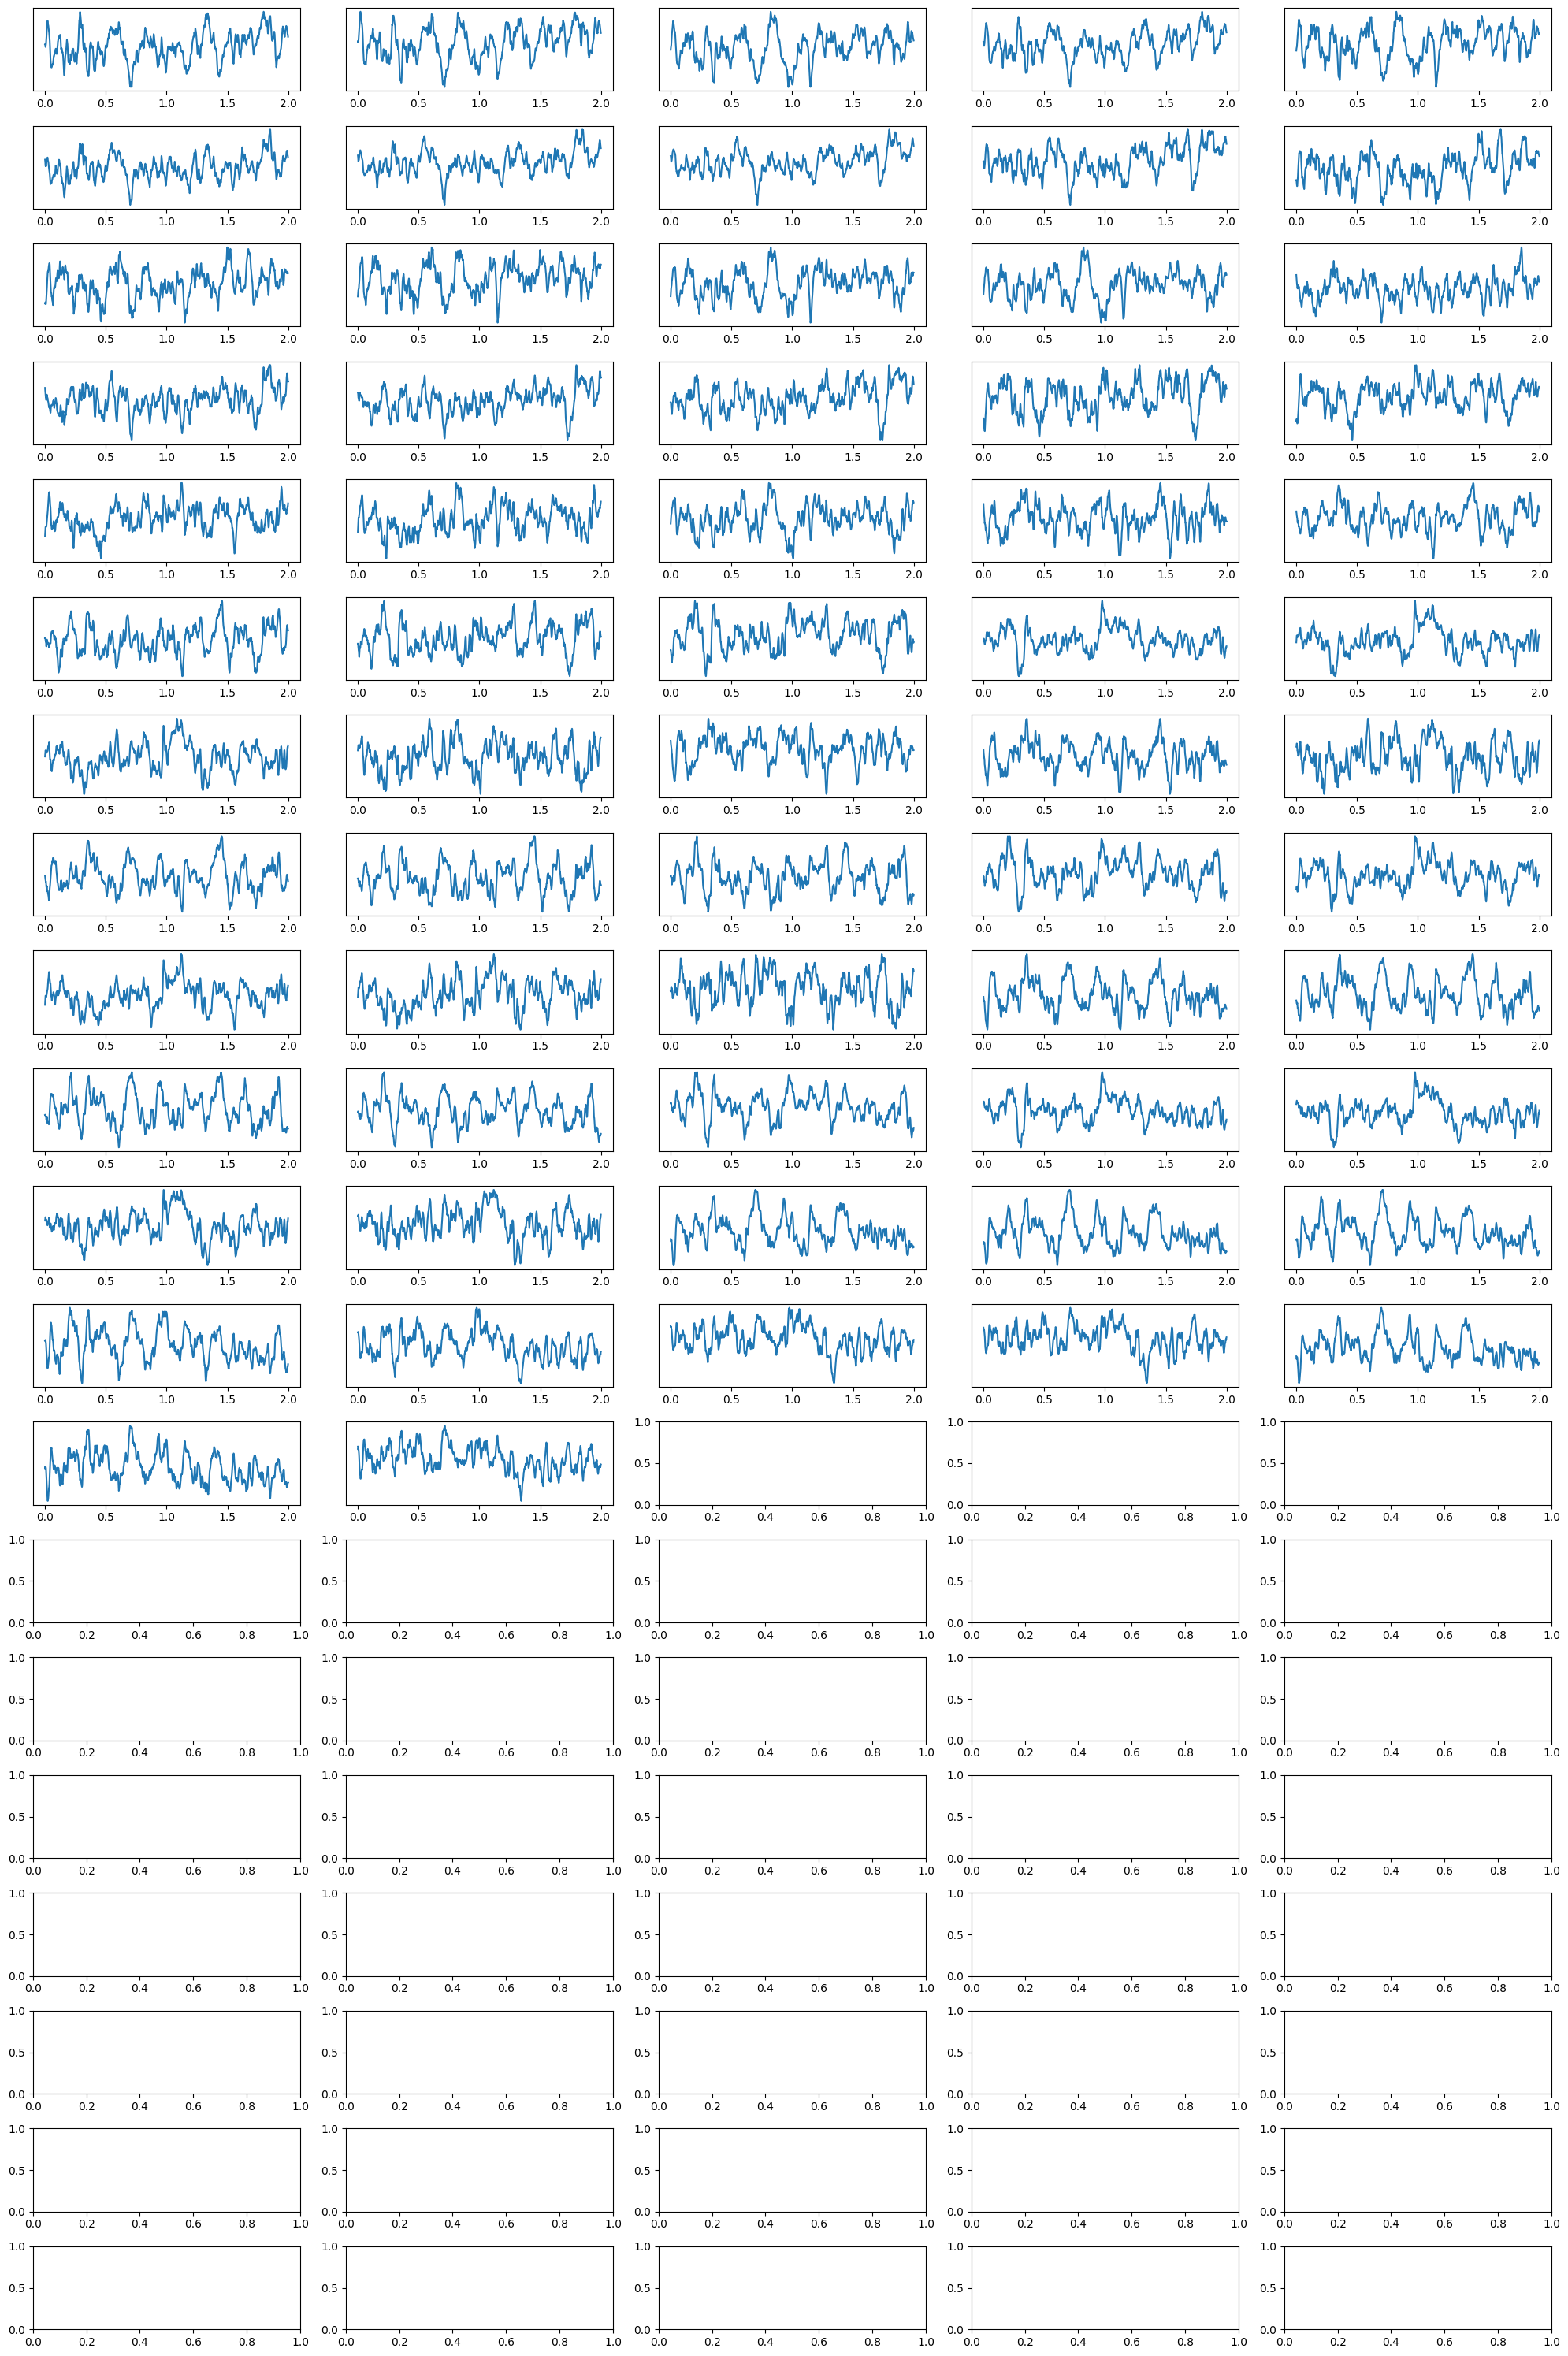

In [646]:
fig, ax = plt.subplots(nrows=20, ncols=5, figsize=(20, 30))

node = 0
for row in ax:
    for col in row:
        col.plot(time_seconds,  V_T_sim.T[:, node])
        col.tick_params(left=False, labelleft=False)
        node += 1 
    plt.tight_layout()

plt.show()
plt.close(fig)

In [5]:
ch_names = ['CH{}'.format(i) for i in range(62)]
# Create info dictionary

fake_info = mne.create_info(ch_names, sfreq=eeg_freq)
raw = mne.io.RawArray(data=V_T_sim.T, info=fake_info)

plt.switch_backend('QtAgg')

fig = raw.plot(scalings=10)

Creating RawArray with float64 data, n_channels=62, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Using matplotlib as 2D backend.


: 

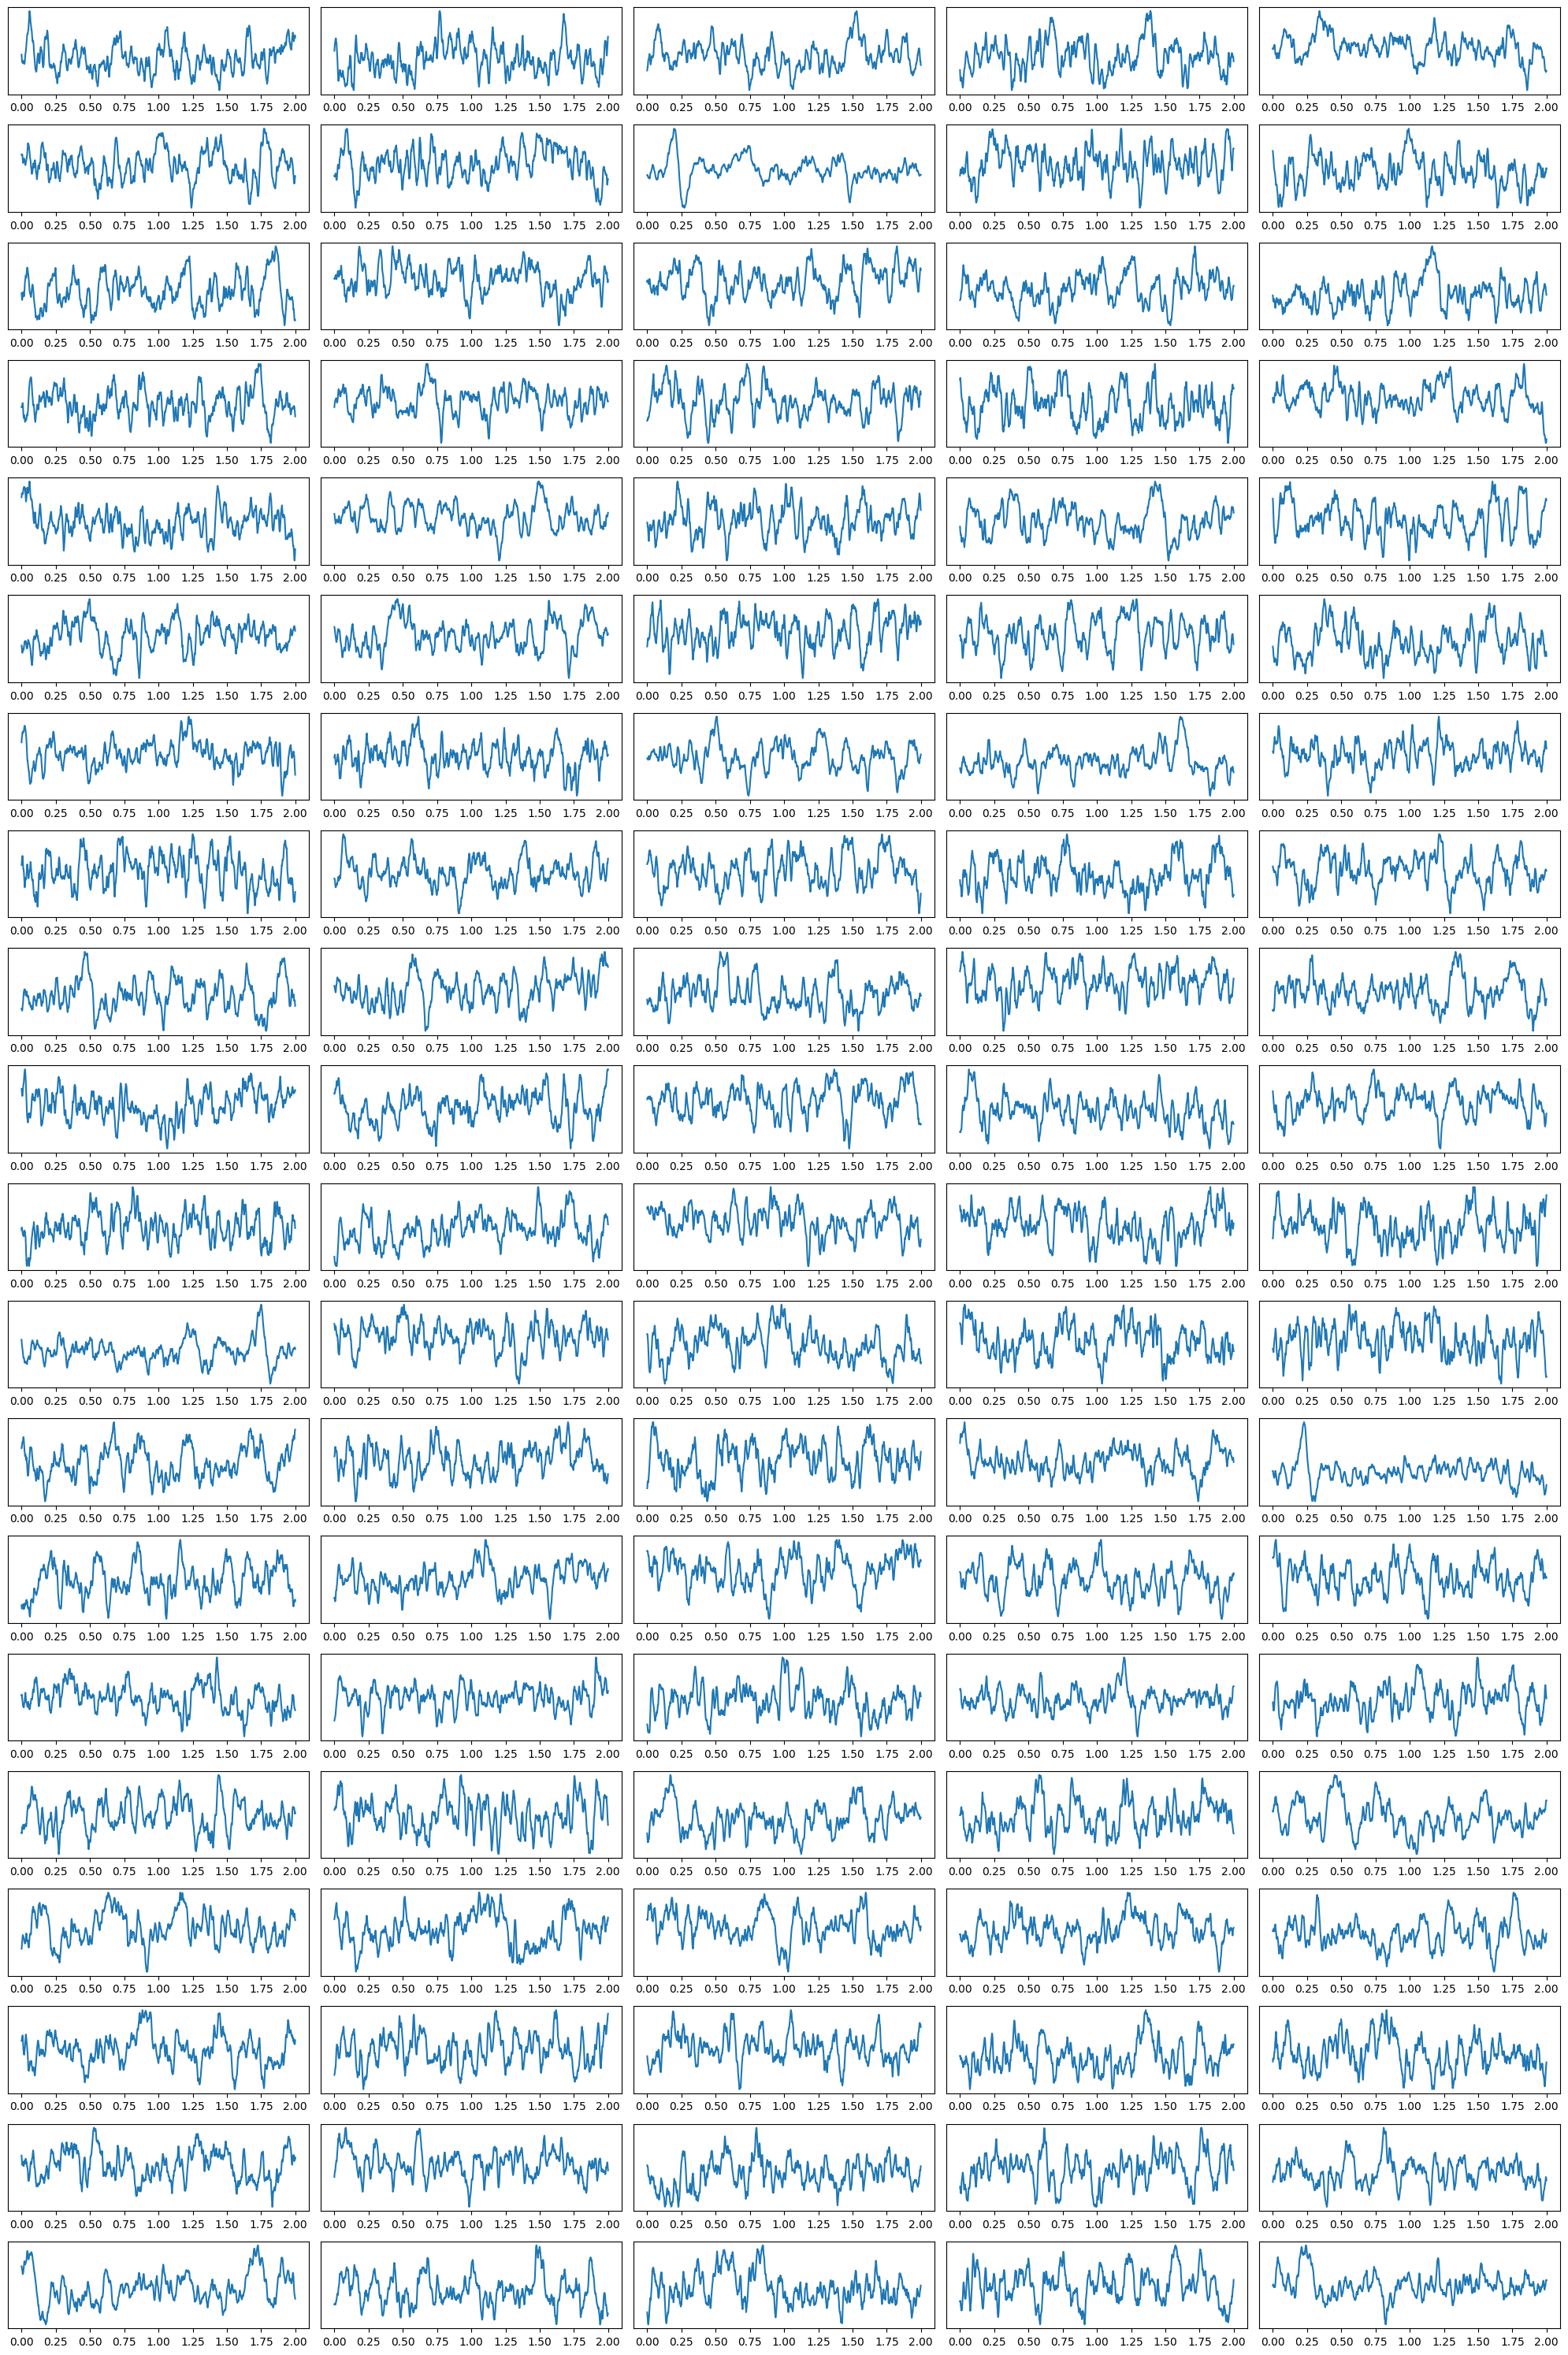

In [139]:
fig, ax = plt.subplots(nrows=20, ncols=5, figsize=(20, 30))

node = 0
for row in ax:
    for col in row:
        col.plot(time_seconds,  V_T_sim[:, node])
        col.tick_params(left=False, labelleft=False)
        node += 1 
    plt.tight_layout()

plt.show()
plt.close(fig)